In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from google.colab import files
uploaded=files.upload()

Saving salary_data.csv to salary_data (1).csv


In [42]:
df=pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [44]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
df.skew()

,0
YearsExperience,0.37956
Salary,0.35412


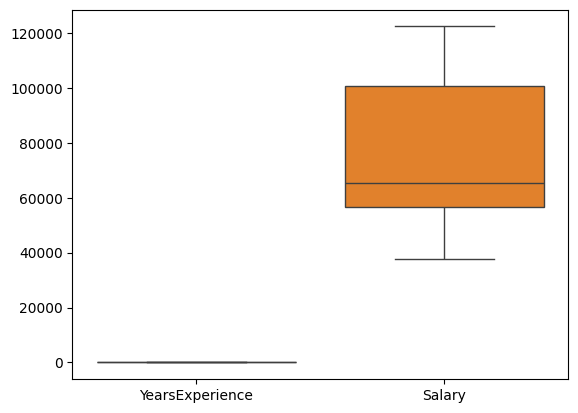

In [46]:
sns.boxplot(df)
plt.show()

In [48]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


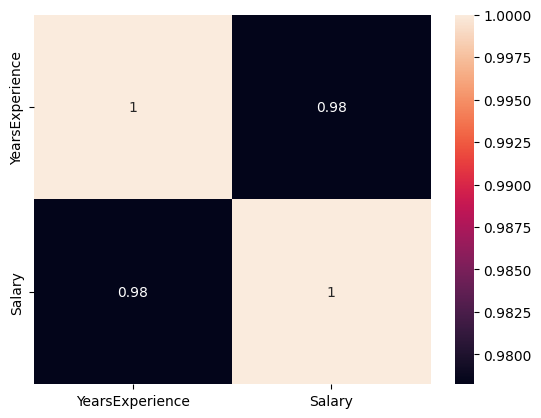

In [49]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [65]:
X=df[['YearsExperience']]
y=df['Salary']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
linear_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),       # scale feature
    ('regressor', LinearRegression())   # linear regression
])

In [68]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [69]:
y_pred_train=linear_pipeline.predict(X_train)
from sklearn.metrics import mean_squared_error,r2_score
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Train R2 Score:',r2_score(y_train,y_pred_train))

Train RMSE: 6012.459573099955
Train R2 Score: 0.9411949620562126


In [70]:
y_pred_test=linear_pipeline.predict(X_test)
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('Test R2 Score:',r2_score(y_test,y_pred_test))

Test RMSE: 3580.97923732134
Test R2 Score: 0.988169515729126


In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    linear_pipeline,  # pipeline
    X, y,            # full dataset
    cv=5,            # number of folds
    scoring='r2'     # R² score; you can also use 'neg_mean_squared_error'
)

print("R² scores for each fold:", scores)
print("Mean R² score:", scores.mean())

R² scores for each fold: [ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
Mean R² score: -0.05336427684509657


In [72]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(
    linear_pipeline,
    X, y,
    cv=5,
    scoring='neg_mean_squared_error'
)

mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE scores for each fold: [5089.70910462 5565.4891967  7731.79553004 8271.45925566 5980.52992967]
Mean RMSE: 6527.796603338694


Given the discrepancy in R2 scores, let's visualize the actual vs. predicted values and the original data to understand the model's performance better.

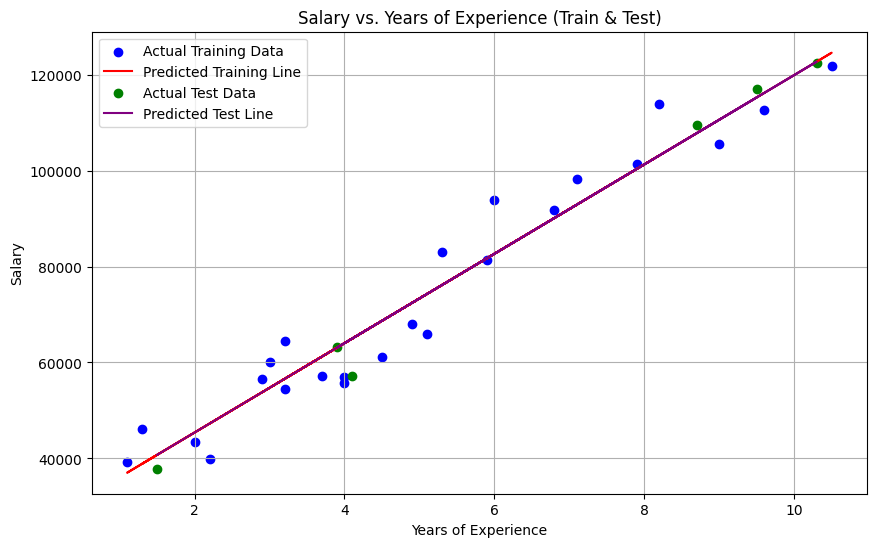

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data')
plt.plot(X_train, y_pred_train, color='red', label='Predicted Training Line')
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.plot(X_test, y_pred_test, color='purple', label='Predicted Test Line')
plt.title('Salary vs. Years of Experience (Train & Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

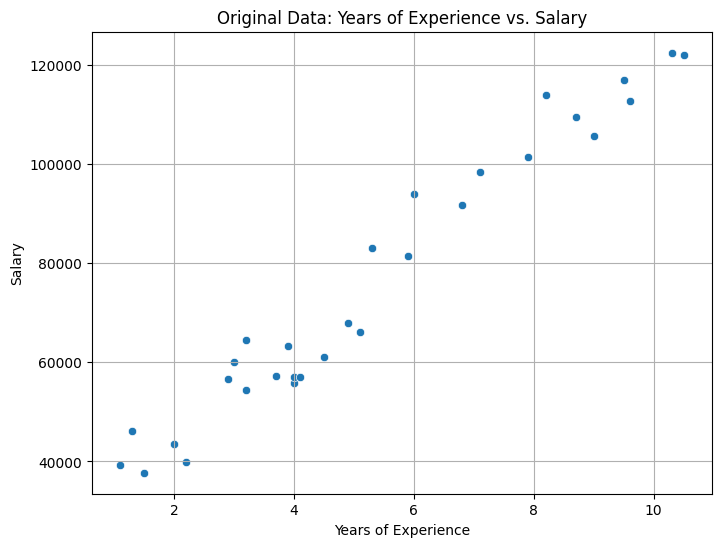

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Original Data: Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()